In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data/netflix_data.csv


In [2]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("/kaggle/input/netflix-data/netflix_data.csv", index_col=0)

# Start by subsetting a Df where title is Movie, store result in a new var
movie_df = netflix_df[netflix_df["type"] == "Movie"]

# Filter this df to retreive Movies released between 1990 and 1999, both yrs included
movie_df = movie_df[movie_df["release_year"] >= 1990]
movie_df = movie_df[movie_df["release_year"] <= 1999]
movie_df


,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...
s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action


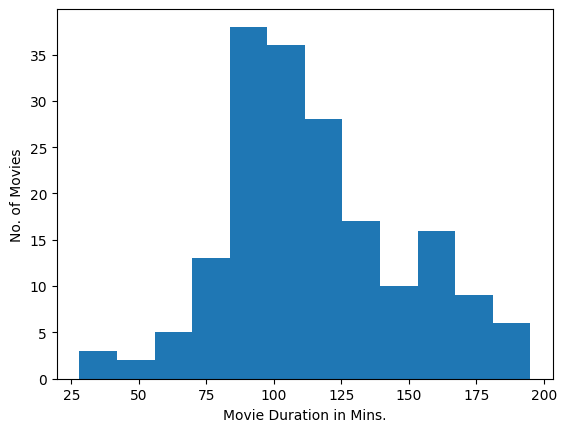

In [3]:
# What was the most frequent movie duration in the 1990s? 

# to see how Movie Durations are distributed for the above DF (Movies in the 1990s),
# let's plot a Histogram to visualize Duration distribution
plt.hist(movie_df["duration"], bins=12)
plt.xlabel("Movie Duration in Mins.")
plt.ylabel("No. of Movies")
plt.show()

# save the observation in a variable as an integer value
# observation - most frequent movie duration in the 1990s
duration = 93

In [4]:
# count the number of Short "Action" movies in 1990s (short is defined as duration < 90 mins)

# start by subsetting a DF from our above set by filtering genre to "Action"
movie_df_action = movie_df[movie_df["genre"] == "Action"]

# start by initializing the short movie count to 0
short_movie_count = 0

# iterate through movie durations column in the given d.f
# increment short_movie_count when duration < 90 mins
for label, row in movie_df_action.iterrows():
    if row["duration"] < 90:
        short_movie_count += 1
        
print(short_movie_count)

7
